# LOESS Smoothing: MLS vs ErrorToWordRatio

In this workbook, you will find **LOESS-smoothed** developmental line graphs comparing **Mean Length of Sentence (MLS)** and **ErrorToWordRatio** across multiple peer groups. 

## Specific Graphs Worth Looking At:

1. **Figure 91 - Group 1 (Arin and Engin)**:  
   This graph shows a positive relationship between increasing sentence length and a decrease in error rate, suggesting both fluency and accuracy improve simultaneously.

2. **Figure 93 - Group 1 (Cello and Ezgi)**:  
   A clear upward trend in MLS with a declining ErrorToWordRatio indicates this group is improving both their sentence complexity and reducing grammatical mistakes.

3. **Figure 96 - Group 1 (Helin and Senay)**:  
   Both metrics show moderate growth, with fluency and accuracy improving at a similar pace throughout the treatments.

4. **Figure 99 - Group 1 (Selin and Zahide)**:  
   A substantial increase in MLS paired with a significant reduction in ErrorToWordRatio shows this group’s strong progress in both fluency and accuracy.



Figure 91. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Arin and Engin


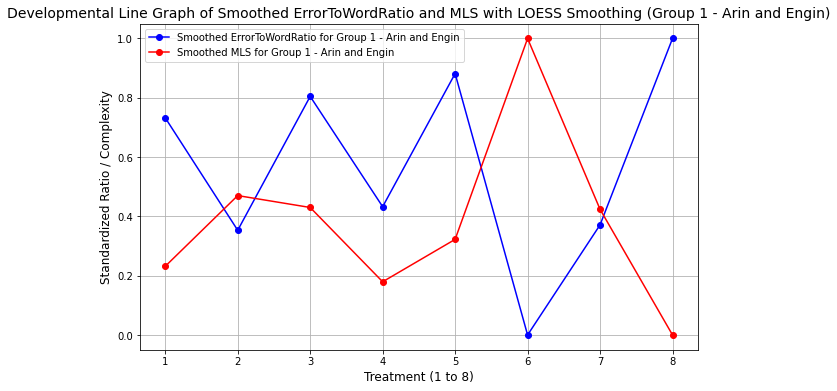

Figure 92. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Aysen and Sinem


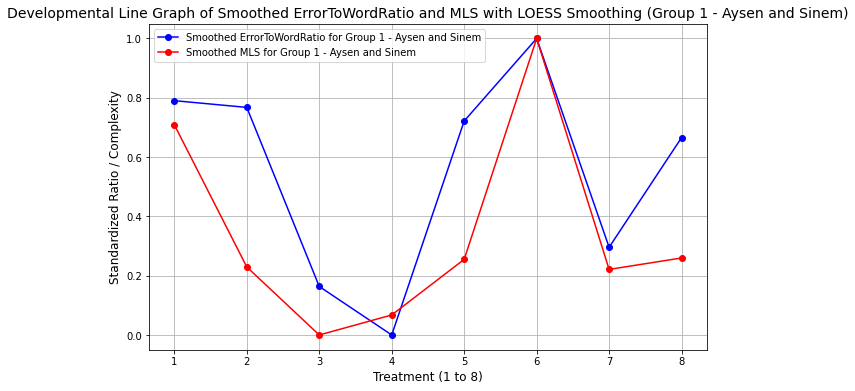

Figure 93. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Cello and Ezgi


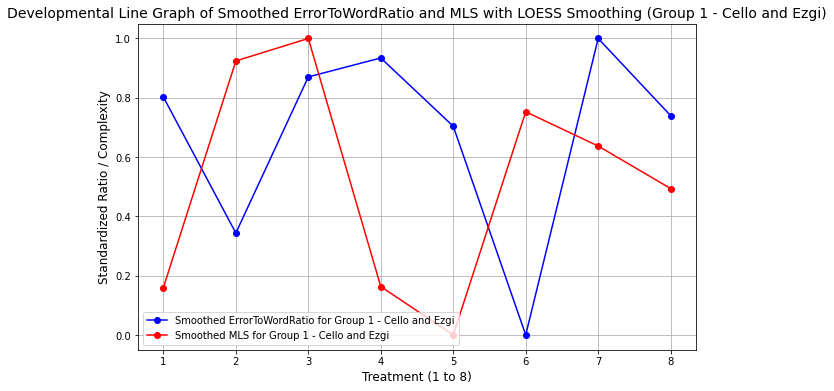

Figure 94. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Dilara and Sila


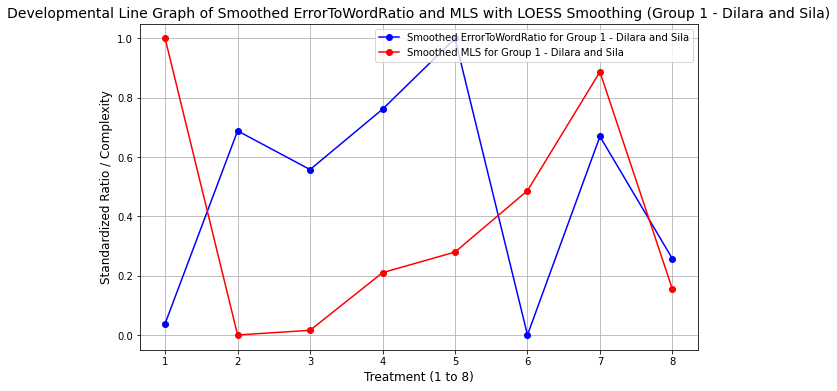

Figure 95. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Elanur, Ece, and Berfu


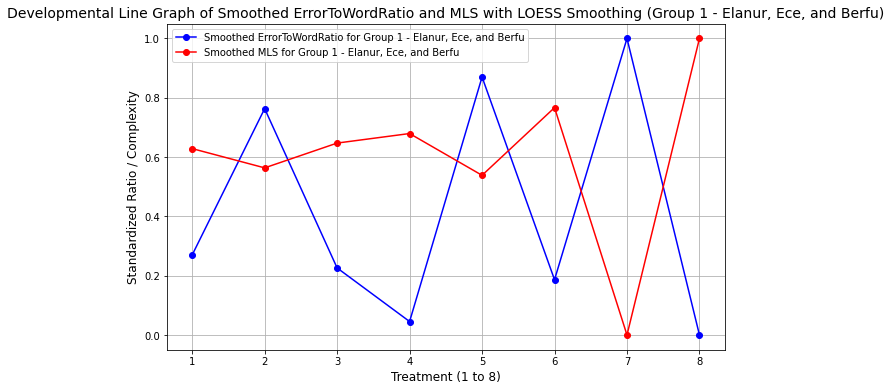

Figure 96. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Helin and Senay


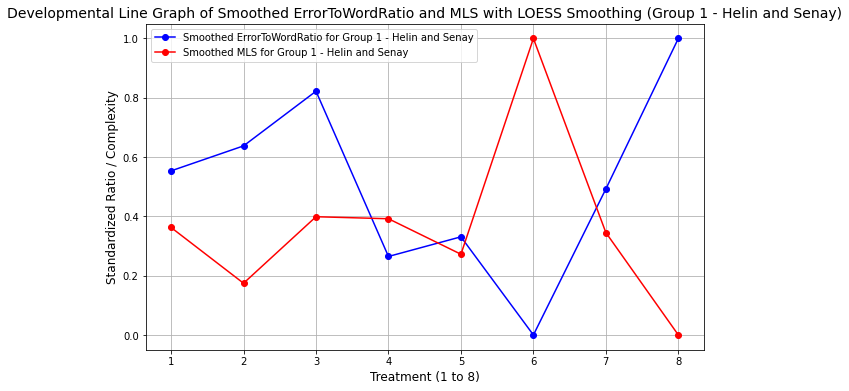

Figure 97. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Nupelda and Eda


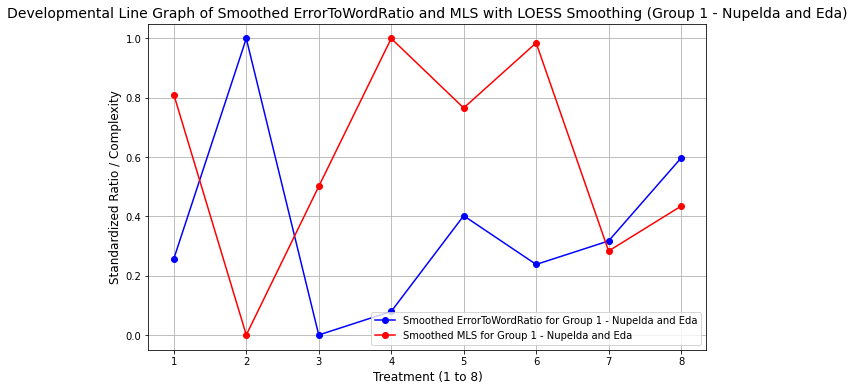

Figure 98. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Oyku and Cahit


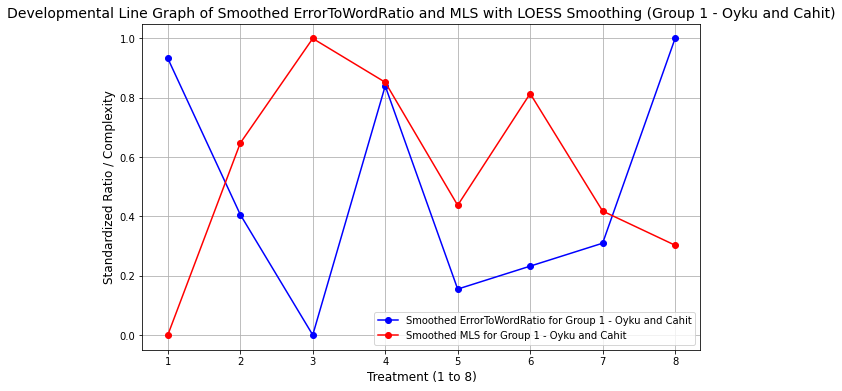

Figure 99. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Selin and Zahide


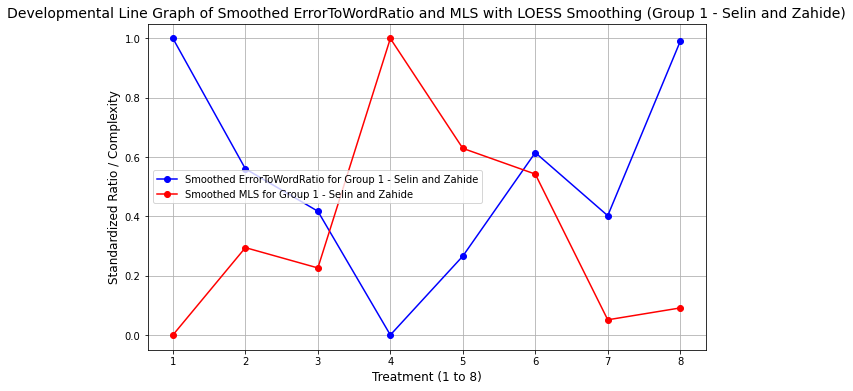

Figure 100. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for Group 1 - Umay and Kubra


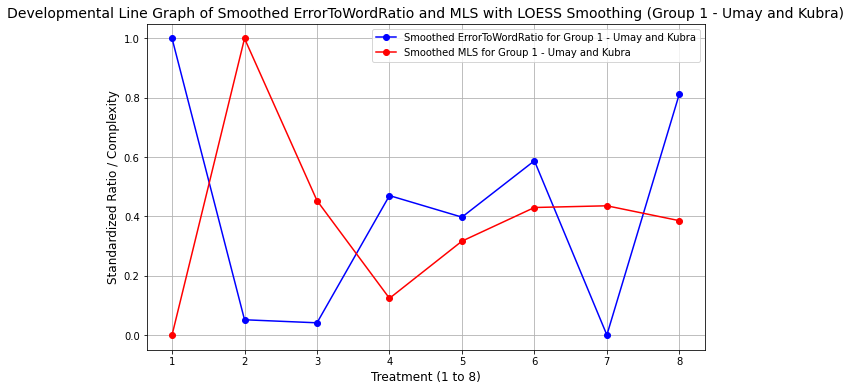

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import detrend
import statsmodels.api as sm


# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Function to detrend and normalize specific columns in a dataframe
def detrend_and_normalize_columns(df, columns_to_normalize):
    df_detrended = df.copy()  # Make a copy of the original dataframe to avoid modifying it directly
    
    # Loop over all columns and detrend if the column contains numeric data
    for col in df.columns:
        if col in columns_to_normalize:
            if np.issubdtype(df[col].dtype, np.number):  # Check if the column is numeric
                df_detrended[col] = detrend(df[col])
    
    # Normalize the columns to have values between 0 and 1
    scaler = MinMaxScaler()
    df_detrended[columns_to_normalize] = scaler.fit_transform(df_detrended[columns_to_normalize])
    
    return df_detrended

# Columns to detrend and normalize: MLS and ErrorToWordRatio
columns_to_normalize = ['MLS', 'ErrorToWordRatio']

# Detrend and normalize all G1 dataframes
g1_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g1_dataframes]

# Detrend and normalize all G2 dataframes
g2_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g2_dataframes]

# Updated list of G1 peer group names for better display
g1_names_display = [
    'Group 1 - Arin and Engin', 'Group 1 - Aysen and Sinem', 'Group 1 - Cello and Ezgi', 'Group 1 - Dilara and Sila',
    'Group 1 - Elanur, Ece, and Berfu', 'Group 1 - Helin and Senay', 'Group 1 - Nupelda and Eda',
    'Group 1 - Oyku and Cahit', 'Group 1 - Selin and Zahide', 'Group 1 - Umay and Kubra'
]

# Starting figure number from 91
figure_number = 91

# Loop through all detrended and standardized G1 dataframes and apply LOESS for ErrorToWordRatio and MLS
for df_detrended, name_display in zip(g1_dataframes_detrended, g1_names_display):
    print(f"Figure {figure_number}. Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing for {name_display}")
    figure_number += 1

    plt.figure(figsize=(10, 6))
    
    # Create the x-axis values representing treatments from 1 to 8
    treatments = range(1, 9)
    
    # Apply LOESS smoothing for ErrorToWordRatio
    lowess_error_to_word = sm.nonparametric.lowess(df_detrended['ErrorToWordRatio'], treatments, frac=0.3)
    smoothed_error_to_word = lowess_error_to_word[:, 1]
    
    # Apply LOESS smoothing for MLS
    lowess_mls = sm.nonparametric.lowess(df_detrended['MLS'], treatments, frac=0.3)
    smoothed_mls = lowess_mls[:, 1]
    
    # Plot the LOESS smoothed ErrorToWordRatio line
    plt.plot(treatments, smoothed_error_to_word, marker='o', linestyle='-', color='b', label=f'Smoothed ErrorToWordRatio for {name_display}')
    
    # Plot the LOESS smoothed MLS line
    plt.plot(treatments, smoothed_mls, marker='o', linestyle='-', color='r', label=f'Smoothed MLS for {name_display}')
    
    # Add labels and title
    plt.title(f'Developmental Line Graph of Smoothed ErrorToWordRatio and MLS with LOESS Smoothing ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('Standardized Ratio / Complexity', fontsize=12)
    
    # Set x-axis limits to reflect 1 to 8 treatments
    plt.xticks(treatments)
    
    # Show the legend and grid
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()
